In [152]:
import re
import pandas as pd
from itertools import repeat
import numpy as np
import os
import glob
import re
import matplotlib.pyplot as plt
import shutil

In [2]:
root  = "/Users/yusuf/Desktop/2010-2019 TC Data"
output  = "/Users/yusuf/Desktop/clean_csv_W"

In [3]:
os.mkdir(output)

In [ ]:
# /home/danieluwitonze/Documents/PROJECT /2010-2019 TC Data/20161006-1009 AERE
# We manually kept  this Sodar A1E folder from the above location on desktop

In [4]:
for d in os.listdir(root):
    if os.path.isdir(os.path.join(root,d)):
        path  = os.path.join(root,d)
        outpath = os.path.join(output,d)
        os.mkdir(outpath)
        for subd in os.listdir(path):
            subpath =  os.path.join(path,subd)
            suboutpath = os.path.join(outpath,subd)
            os.mkdir(suboutpath)
            for file in os.listdir(subpath):
                pass

In [140]:
for d in os.listdir(root):
    if os.path.isdir(os.path.join(root,d)):
        path  = os.path.join(root,d)
        outpath = os.path.join(output,d)
        for subd in os.listdir(path):
            subpath =  os.path.join(path,subd)
            suboutpath = os.path.join(outpath,subd)
            for file in os.listdir(subpath):
                filepath =  os.path.join(subpath,file)
                exclude = [ '.T1A', '.t1a', '.gz','.csv']
                filename,file_extension =  os.path.splitext(filepath)
                if(os.path.isfile(filepath) and file_extension not in exclude):
                    dataset=pd.read_csv(filepath,delimiter="\t",skiprows=0,header=None)
                    df  = list(dataset.iloc[23])
                    dfstr  =  str(df[0])
                    dfstr = dfstr.split()
                    increment =  int(dfstr[1])
                    units =   str(dataset.iloc[21]).split()[1:] + ['a']
                    new_units = ['hour','day','month'] + units
                    text_file = open(filepath,"r")
                    data = text_file.read()
                    x1=data.split("\n")
                    start = 35
                    end = len(x1)-1
                    seq1=[i for i in range(start,end,increment+1)]
                    y1=[i for i in range(start,end)]
                    for element in y1:

                        if element in seq1:

                            y1.remove(element)
                    block_data=[]
                    for i in y1:
                        line=x1[i].split()
                        block_data.append(line)
                    df1=pd.DataFrame.from_records(block_data)
                    timedata=[]
                    for i in seq1:
                        time=x1[i].split()
                        timedata.append(time)
                    df2=pd.DataFrame.from_records(timedata,columns=['hour','day','month'])
                    df2['Date/time'] = df2[['hour','day','month']].astype(str).agg('-'.join, axis = 1)
                    df2.drop(df2[['hour','day','month']],inplace=True,axis=1)
                    new_df=pd.DataFrame(np.repeat(df2.values,increment,axis=0))
                    result = pd.concat([new_df,df1.iloc[:,:4]], axis=1)
                    cols  =['Date/time','QC','Height','WS','WD']
                    result.columns  =  cols
                    result.drop(result[result['QC'] != '0' ].index,axis=0,inplace=True)
                    outputfile =  filename.split('/')[-1] + '.' + filepath.split('/')[-1].split('.')[-1] +'.csv'
                    os.chdir(suboutpath)
#                     print(f"{suboutpath}/ {outputfile} rows = {result.shape[0]}, half = {result.shape[0]//2}")
                    result =  pd.DataFrame(result)
                    result.to_csv(outputfile)
                    result.to_csv(outputfile,index=False, sep=' ', mode='a')
                    redf =  pd.read_csv(outputfile)
                    a = np.int((redf.shape[0]-1)/2)
                    redf.drop(redf.iloc[a:,].index,axis=0,inplace=True)
                    redf.drop(['Unnamed: 0'], axis = 1,inplace=True)
                    redf.to_csv(outputfile,index=False)
#                     print(redf.head())
#                     print(f"new rows {redf.shape[0]} divided = {(redf.shape[0]- 1)/2}")
#                 break
#             break
#     break

In [ ]:
output  = "/Users/yusuf/Desktop/clean_csv_W"

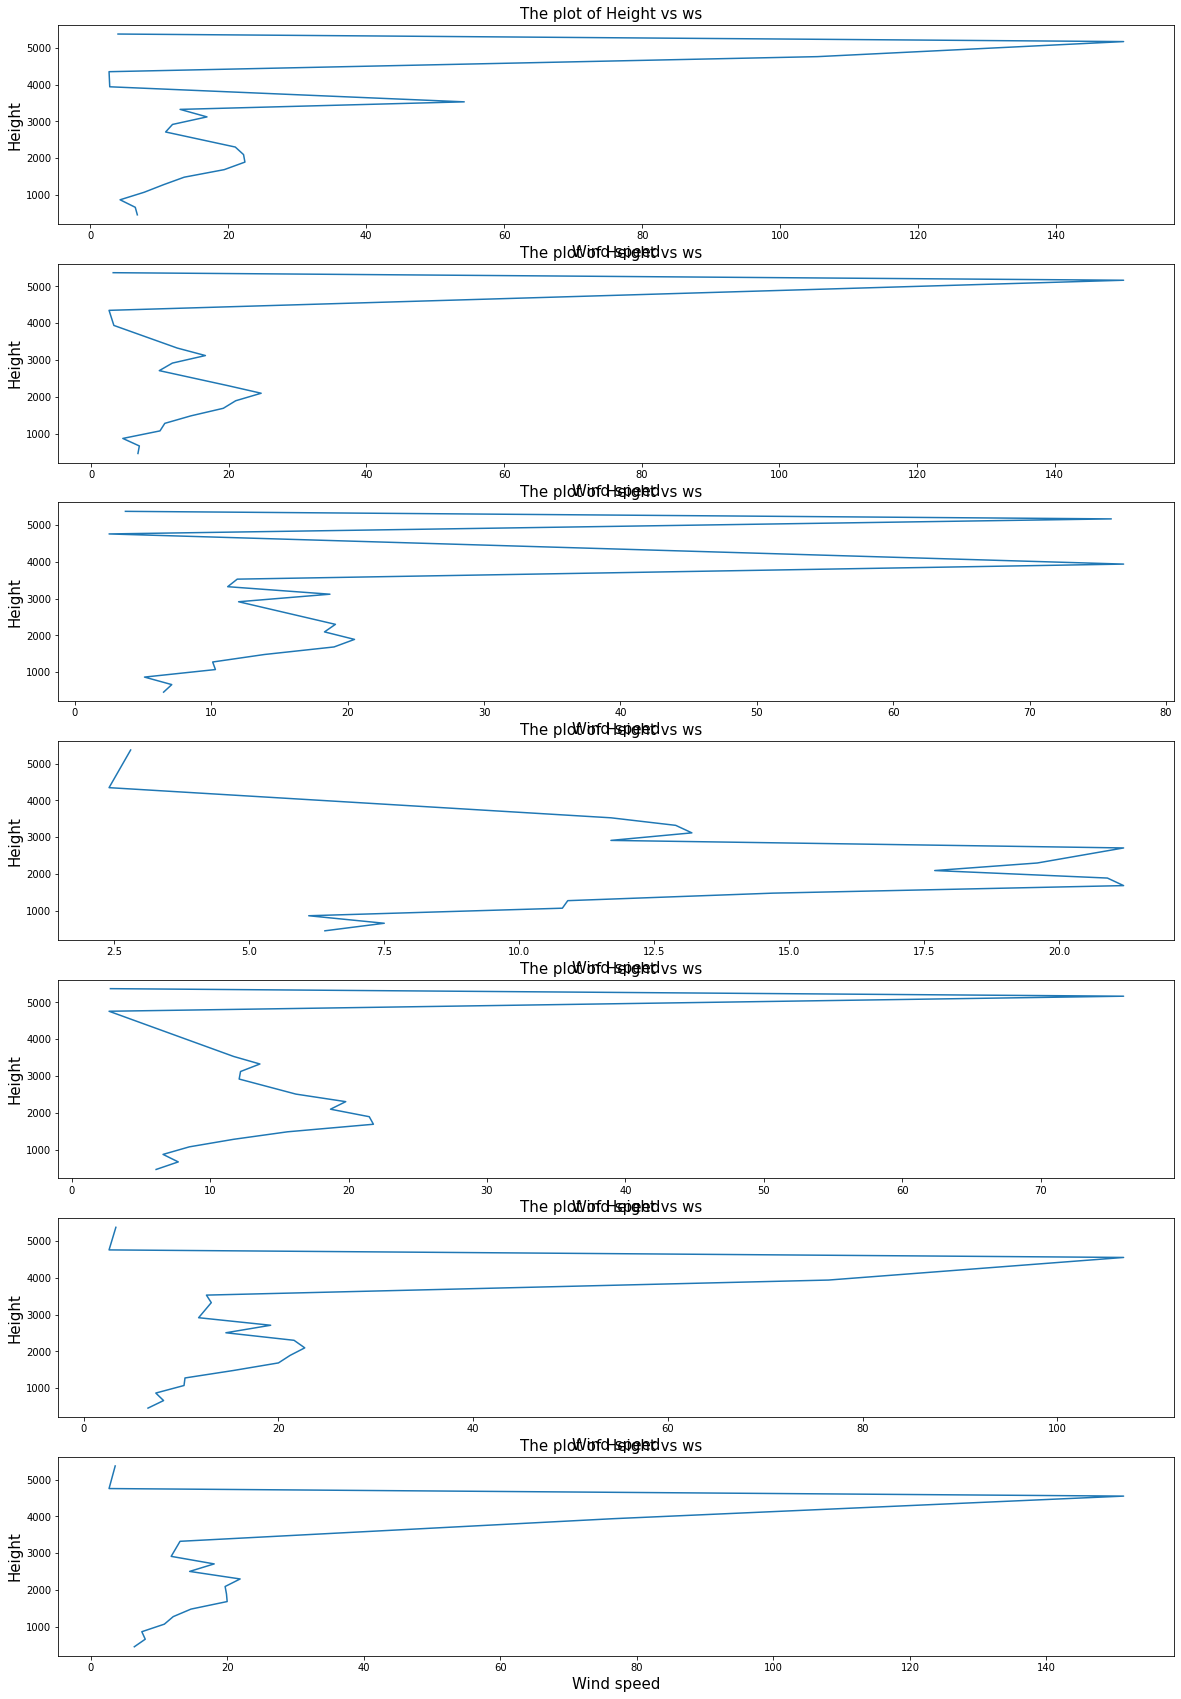

In [156]:
for d in os.listdir(output):
    if os.path.isdir(os.path.join(output,d)):
        path  = os.path.join(output,d)
        for subd in os.listdir(path):
            subpath =  os.path.join(path,subd)
            suboutpath = os.path.join(outpath,subd)
            for file in os.listdir(subpath):
                filepath =  os.path.join(subpath,file)
                include = [ '.csv']
                filename,file_extension =  os.path.splitext(filepath)
                if(os.path.isfile(filepath) and file_extension in include):
                    outputfile =  filename.split('/')[-1] + '.' + filepath.split('/')[-1].split('.')[-1] +'.png'
                    df =  pd.read_csv(filepath)
                    plt.figure(figsize=(20,30))
                    c =  7
                    times = df.iloc[:,0].unique()
                    for k in range(c):
                        cleant = df[df['Date/time']==times[k]]
                        plt.subplot(c,1,k+1)
                        a = cleant.iloc[0:,2]
                        b = cleant.iloc[0:,3]
                        plt.plot(b,a)
                        plt.title("The plot of Height vs ws  ",fontsize=15)
                        plt.xlabel('Wind speed',fontsize=15)
                        plt.ylabel('Height',fontsize=15)
                    plt.show()
                break
            break
    break
            